### **AI-POWERED PREDICTIVE ANALYTICS FOR INDUSTRIAL EQUIPMENT MAINTENANCE.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/raw/industrial_equipment_anomaly_data.csv')
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [7]:
df.shape

(7672, 7)

In [6]:
df.info()
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB

Missing values:
 temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

### Encode Categorical Features.

In this step, we convert categorical text data into numeric form so that machine learning algorithms can process it effectively.

---

- **Why Encoding is Needed:**  
  Most machine learning models require numerical inputs, and cannot directly interpret categorical string values.

---

- **Implementation Details:**  
  - We use **`LabelEncoder()`** from `sklearn.preprocessing` to assign a unique integer to each category.  
  - Two encoders are created:  
    - `le1` → For encoding the `equipment` column (equipment types)  
    - `le2` → For encoding the `location` column (equipment installation sites)

---

- **Code Explanation:**  
  1. `le1.fit_transform(df['equipment'])` → Converts each unique equipment type into an integer.  
  2. `le2.fit_transform(df['location'])` → Converts each unique location into an integer.  
  3. The transformed values are stored back into their respective columns in the DataFrame.

---

**Result:**  
The dataset now contains numeric values in place of text labels for the `equipment` and `location` columns, making it compatible with all ML algorithms.

In [6]:
le1 = LabelEncoder()
le2 = LabelEncoder()
df['equipment'] = le1.fit_transform(df['equipment'])
df['location'] = le2.fit_transform(df['location'])

### Exploratory Data Analysis (EDA) – Summary Statistics & Relationships.

In this step, we explore the dataset visually and statistically to understand feature distributions and relationships.

---

### **1. Statistical Summary**
- **`df.describe()`**  
  - Displays statistical measures for each numerical column:  
    - Mean, standard deviation, minimum, quartiles (25%, 50%, 75%), and maximum values.  
  - Helps identify:
    - Data ranges
    - Skewed distributions
    - Potential anomalies

---

### **2. Pairplot – Feature Relationships**
- **`sns.pairplot(df, hue='faulty')`**  
  - Plots pairwise relationships between all numerical features.  
  - Uses the `faulty` column as the hue (color code) to visually distinguish faulty vs. non-faulty equipment.  
  - Useful for spotting correlations, clusters, and separable patterns.

---

### **3. Correlation Heatmap**
- **`sns.heatmap(df.corr(), annot=True, cmap='coolwarm')`**  
  - Shows the correlation coefficient (range: -1 to 1) between features.  
  - High positive correlation → features increase together  
  - High negative correlation → one feature increases as the other decreases  
  - Helps identify redundant features and strong predictive relationships.

---

**Outcome:**  
These plots give a **comprehensive overview** of the dataset’s structure, helping guide feature selection and modeling strategies.

       temperature     pressure    vibration     humidity    equipment  \
count  7672.000000  7672.000000  7672.000000  7672.000000  7672.000000   
mean     70.922478    35.738048     1.611809    50.016574     0.998957   
std      16.200059    10.381593     0.728560    11.841479     0.818410   
min      10.269385     3.620798    -0.428188    10.215077     0.000000   
25%      62.777057    29.485682     1.170906    42.612817     0.000000   
50%      70.156900    35.227544     1.533113    50.024744     1.000000   
75%      77.568387    41.159913     1.924700    57.340513     2.000000   
max     149.690420    79.887734     4.990537    89.984718     2.000000   

          location       faulty  
count  7672.000000  7672.000000  
mean      1.974844     0.099974  
std       1.410159     0.299985  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       2.000000     0.000000  
75%       3.000000     0.000000  
max       4.000000     1.000000  


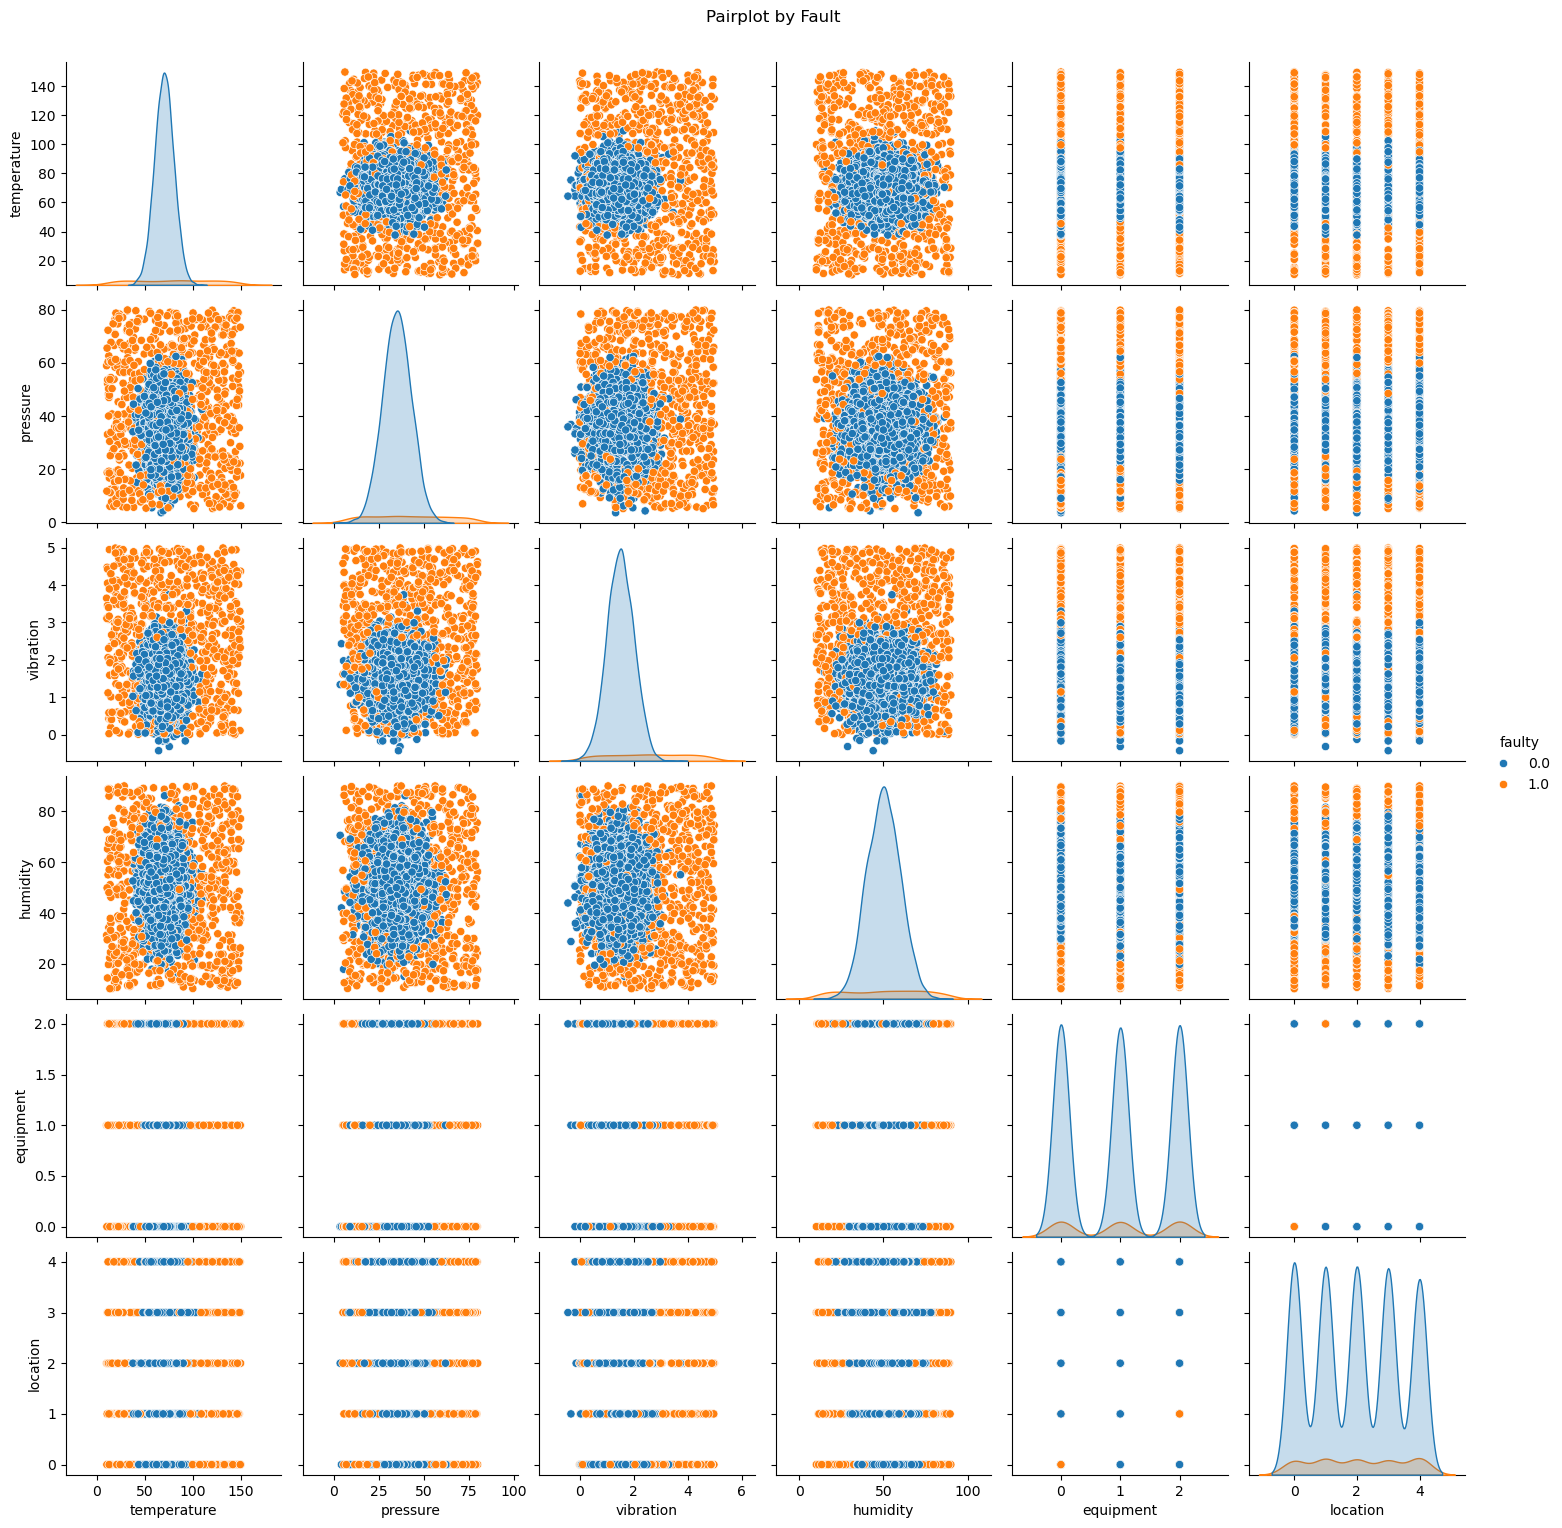

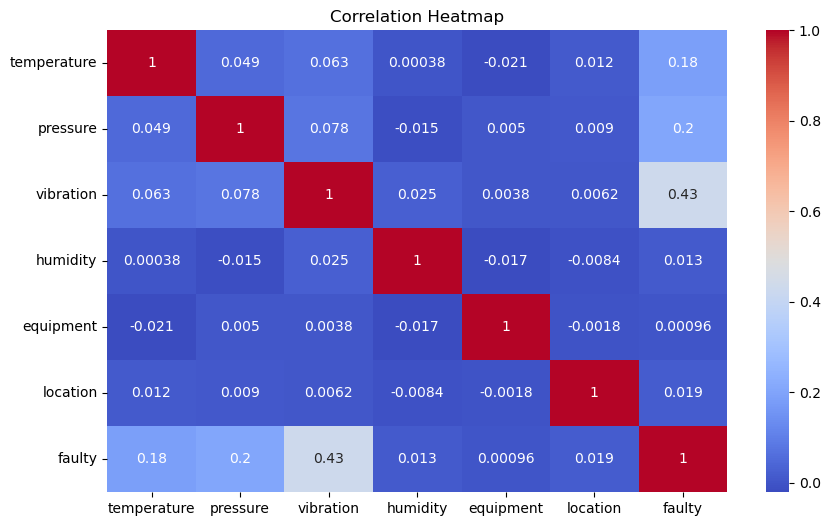

In [7]:
print(df.describe())

sns.pairplot(df, hue='faulty')
plt.suptitle("Pairplot by Fault", y=1.02)
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### *Target Variable Distribution – Faulty vs Non-Faulty Equipment.*

In this step, we visualize the **class distribution** of the target variable (`faulty`) to understand whether our dataset is balanced.

---

### **Plot Details:**
- **`sns.countplot()`**
  - Displays the count of observations for each category in the `faulty` column.  
  - `palette='Set2'` provides distinct colors for better visual clarity.

- **Axes & Labels:**
  - **X-axis:** `Faulty` status (0 = Not Faulty, 1 = Faulty)  
  - **Y-axis:** Number of records in each category  
  - **Title:** `"Faulty vs Non-Faulty Count"`

---

### **Why This Step is Important:**
- If there is **class imbalance** (one category significantly larger than the other), certain models may become biased towards the majority class.
- Helps in deciding whether techniques like **oversampling**, **undersampling**, or **class weighting** are needed for fair model training.

---

**Insight Expected:**  
We get a quick visual understanding of how many equipment instances are faulty versus non-faulty, guiding the next steps in model selection and evaluation.

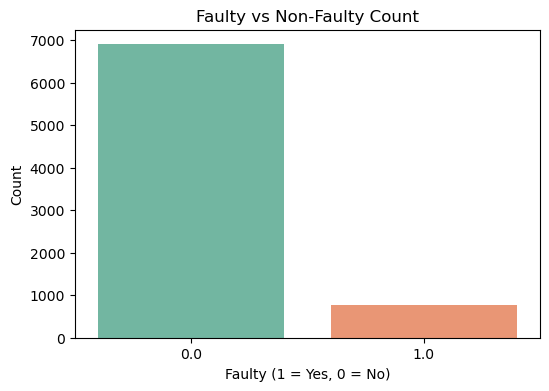

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='faulty', data=df, palette='Set2')
plt.title("Faulty vs Non-Faulty Count")
plt.xlabel("Faulty (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

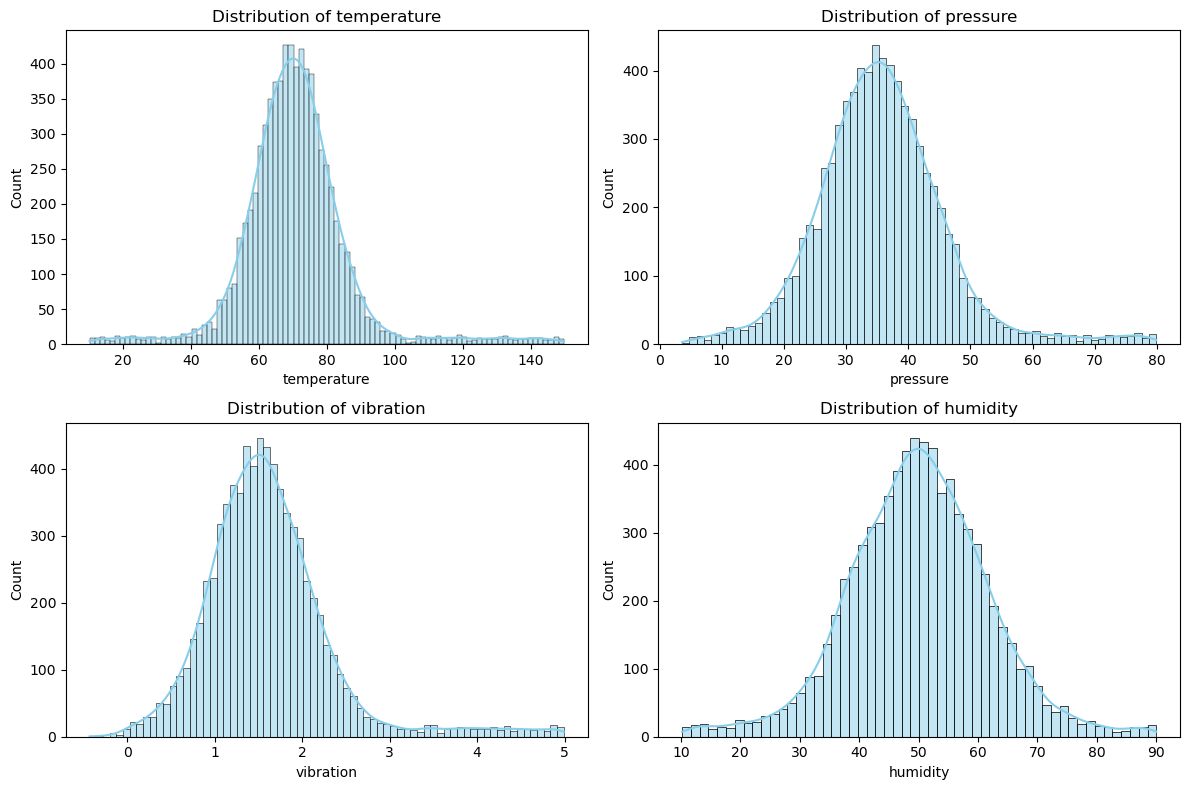

In [9]:
features = ['temperature', 'pressure', 'vibration', 'humidity']
plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

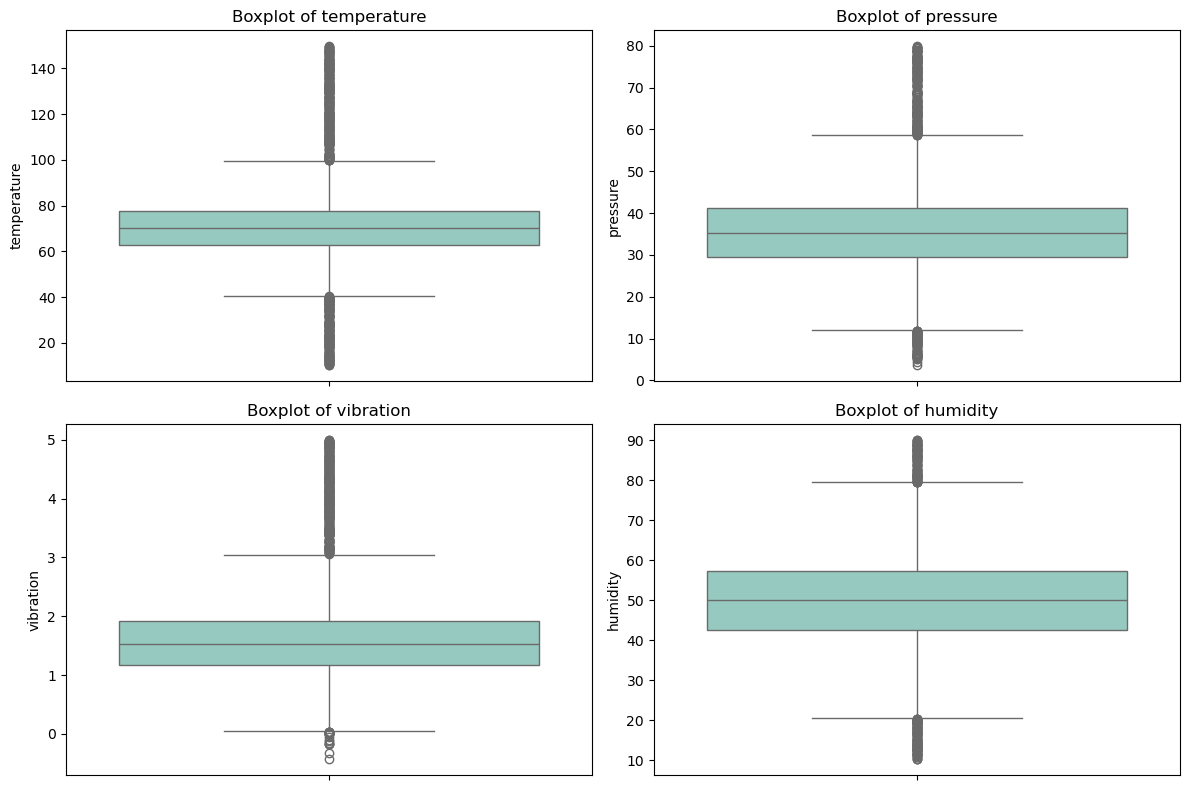

In [10]:
plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col], palette="Set3")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### *Fault Rate by Equipment Type.*

This step visualizes how the **fault rate** varies across different **equipment types**.

---

### **Plot Details:**
- **`sns.barplot()`**
  - X-axis → Encoded `equipment` types.
  - Y-axis → Average fault rate for each equipment category.
  - `palette='coolwarm'` provides a color gradient for better contrast.

- **Interpretation:**
  - The height of each bar represents the proportion of faulty equipment in that category.
  - A higher bar indicates that a specific equipment type has a higher probability of being faulty.

---

### **Why This Step is Important:**
- Identifies **high-risk equipment types**.
- Helps prioritize maintenance efforts for equipment categories with the highest fault rates.
- Provides insight into whether equipment type is a strong predictor in our ML models.

---

**Insight Expected:**  
We can pinpoint which types of equipment are **most prone to faults**, allowing targeted maintenance strategies and possibly influencing model feature importance.

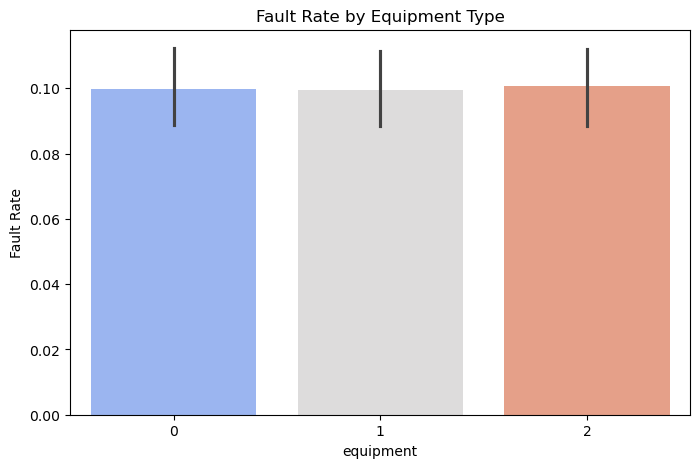

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='equipment', y='faulty', data=df, palette='coolwarm')
plt.title("Fault Rate by Equipment Type")
plt.ylabel("Fault Rate")
plt.show()

### *Fault Rate by Location.*

This step examines how the **fault rate** varies across different **locations** where the equipment is installed.

---

### **Plot Details:**
- **`sns.barplot()`**
  - X-axis → Encoded `location` identifiers.
  - Y-axis → Average fault rate for each location.
  - `palette='coolwarm'` provides a visually clear gradient.

- **Interpretation:**
  - The height of each bar represents the proportion of faulty equipment at that location.
  - Locations with higher fault rates may indicate **environmental** or **operational factors** affecting performance.

---

### **Why This Step is Important:**
- Helps identify **problem-prone locations**.
- Can lead to **location-specific maintenance** strategies.
- May reveal operational inefficiencies or harsher environmental conditions.

---

**Insight Expected:**  
We can discover **high-risk locations** that contribute disproportionately to equipment faults, enabling targeted preventive measures.

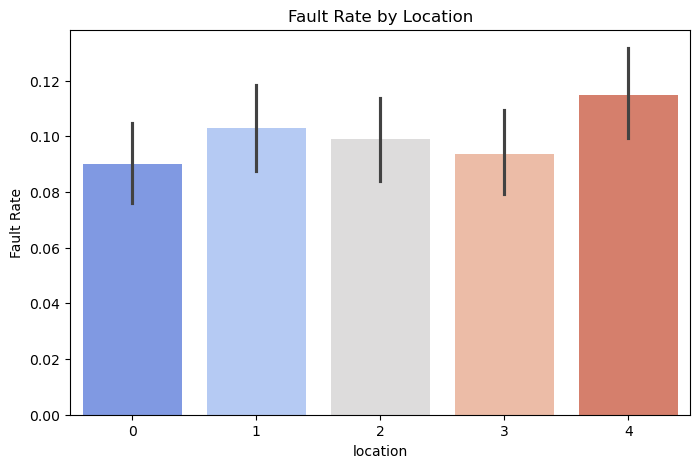

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='location', y='faulty', data=df, palette='coolwarm')
plt.title("Fault Rate by Location")
plt.ylabel("Fault Rate")
plt.show()

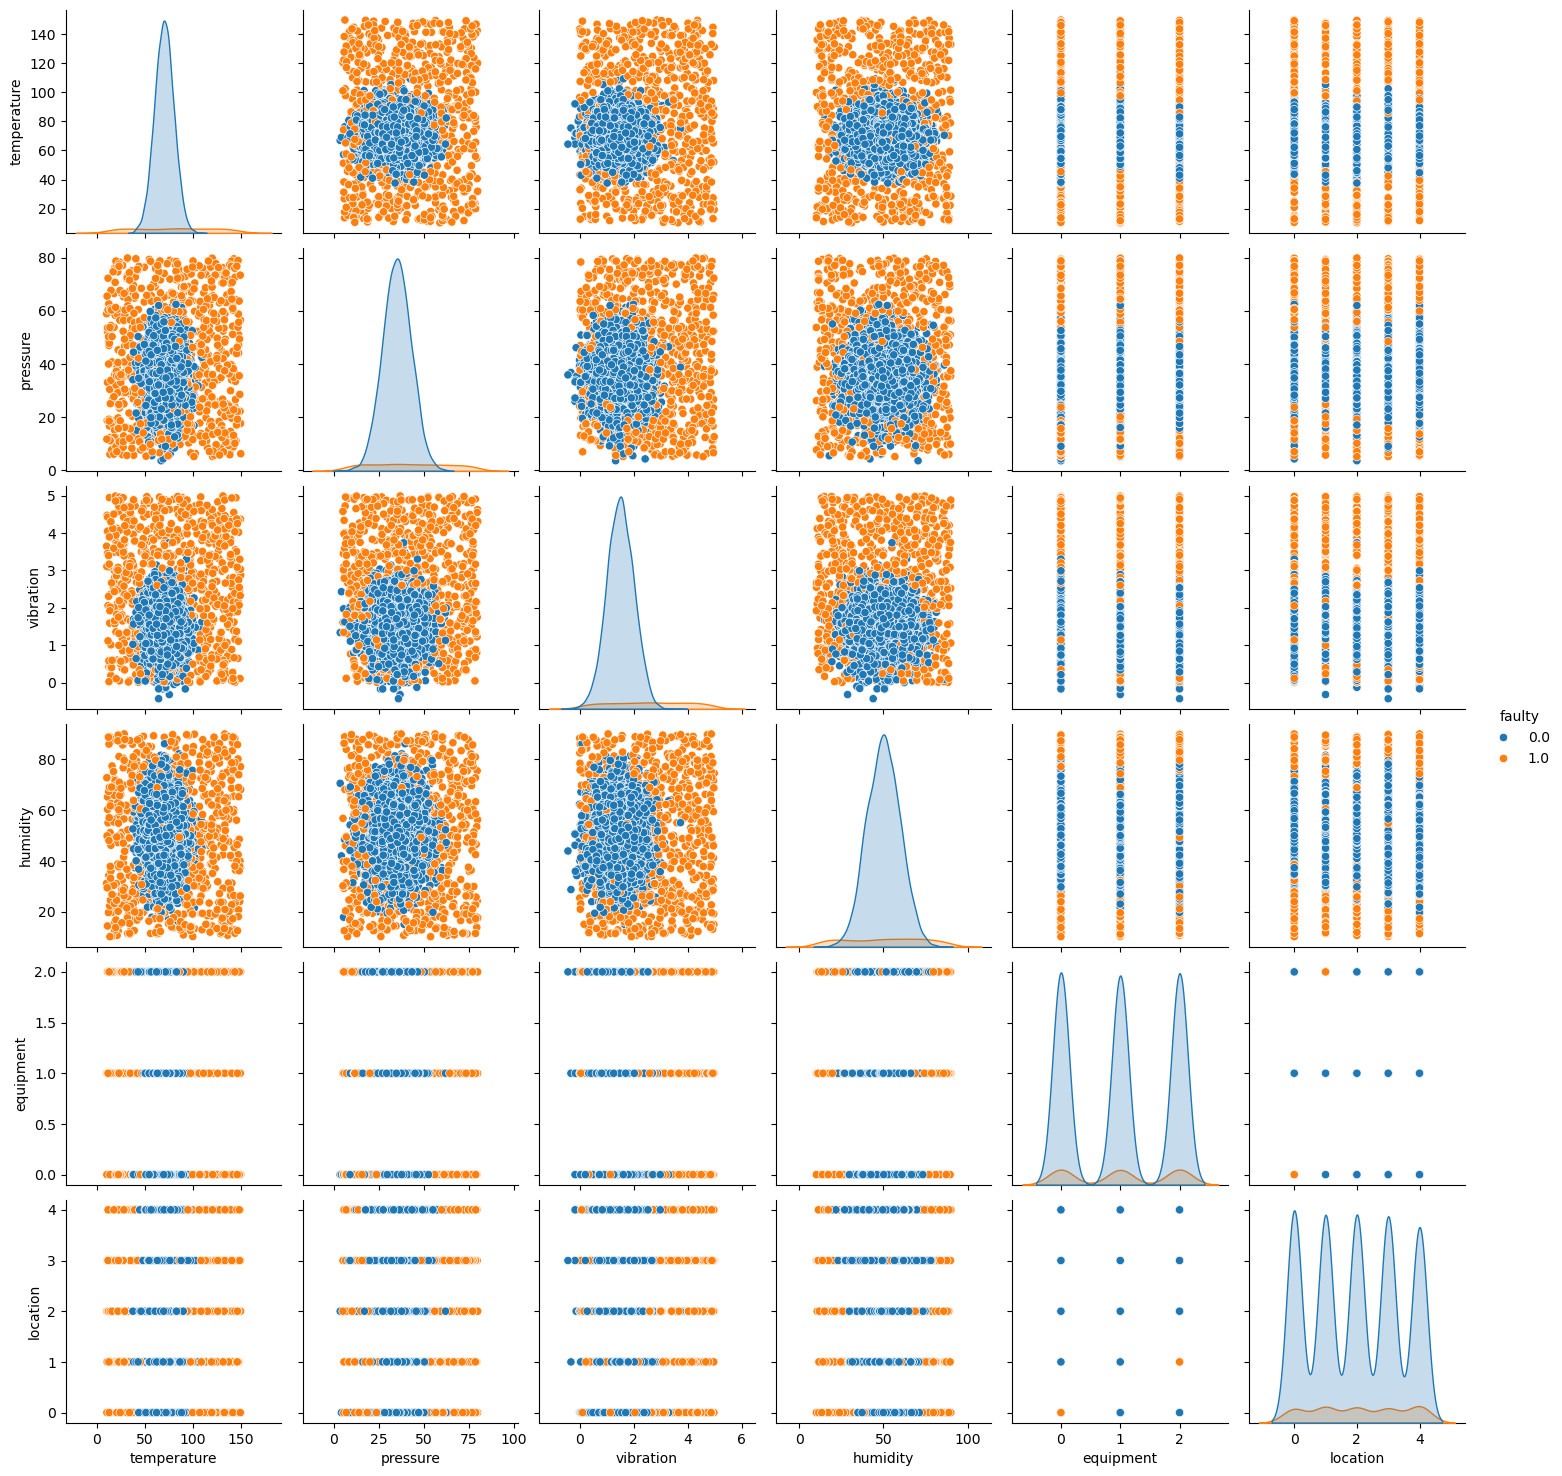

In [13]:
sns.pairplot(df, hue='faulty')
plt.show()

### *Correlation Heatmap.*

This step visualizes the **correlation matrix** for all features in the dataset, helping us understand the relationships between variables.

---

### **Plot Details:**
- **`df.corr()`**
  - Calculates the **Pearson correlation coefficient** between each pair of numerical features.
  - Values range from **-1** (perfect negative correlation) to **+1** (perfect positive correlation).

- **`sns.heatmap()`**
  - Displays the correlation matrix as a color-coded grid.
  - `annot=True` shows the actual correlation values.
  - `cmap='coolwarm'` visually distinguishes positive (red) and negative (blue) correlations.

---

### **Why This Step is Important:**
- Identifies **strongly correlated features** that might be redundant (multicollinearity).
- Helps in **feature selection** and **dimensionality reduction**.
- Reveals potential **relationships** between sensor readings and the fault label.

---

**Insight Expected:**  
Features with high correlation to the target variable (`faulty`) are likely to be **important predictors**, while highly correlated features with each other may need to be dropped or combined.

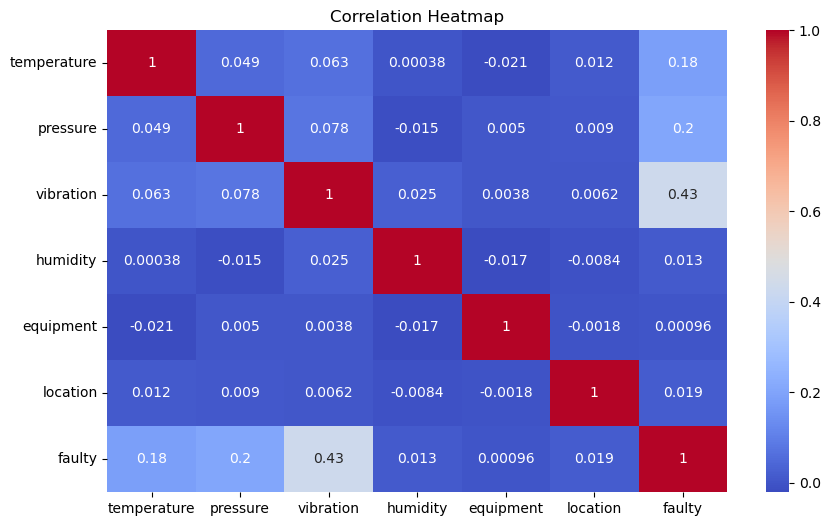

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### *Professional Upper-Triangle Correlation Heatmap.*

This enhanced version of the correlation heatmap provides a cleaner and more professional visualization by displaying only the **upper triangle** of the correlation matrix.

---

### **Plot Details:**
- **`df.corr()`**
  - Computes the **Pearson correlation coefficients** between all numerical features.

- **Upper-Triangle Masking**
  - `np.triu()` creates a mask to hide the redundant lower half of the matrix.
  - This avoids repetition and makes the plot **less cluttered**.

- **`sns.heatmap()` Enhancements**
  - `annot=True` → Displays correlation values.
  - `fmt=".2f"` → Formats values to 2 decimal places.
  - `linewidths=0.5` → Adds thin grid lines for better separation.
  - `cmap='coolwarm'` → Highlights positive correlations in red and negative in blue.

---

### **Why This Step is Important:**
- Offers a **clearer, more professional** view of correlations.
- Focuses on unique correlation pairs without duplication.
- Improves readability for presentations and reports.

---

**Insight Expected:**  
This refined heatmap makes it easier to spot **strong predictive relationships** while keeping the visualization clean and presentation-ready.

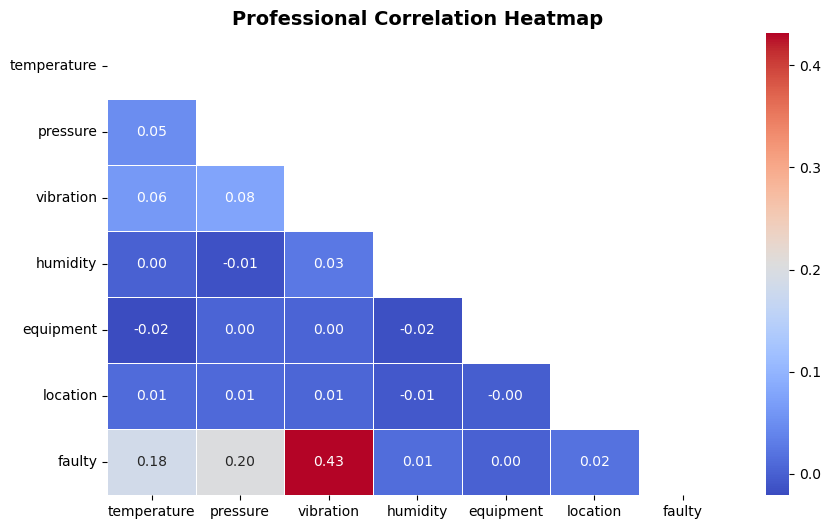

In [15]:
plt.figure(figsize=(10,6))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Professional Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

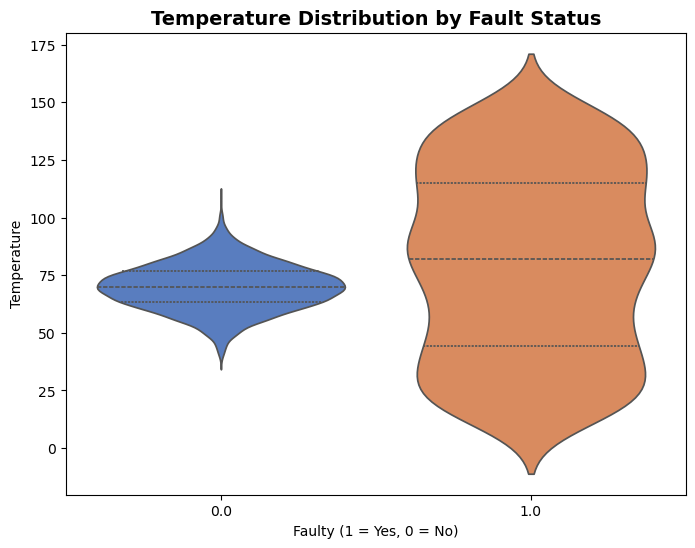

In [16]:
plt.figure(figsize=(8,6))
sns.violinplot(x='faulty', y='temperature', data=df, palette='muted', inner='quart')
plt.title("Temperature Distribution by Fault Status", fontsize=14, fontweight='bold')
plt.xlabel("Faulty (1 = Yes, 0 = No)")
plt.ylabel("Temperature")
plt.show()

In [17]:
X = df.drop('faulty', axis=1)
y = df['faulty']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### *Step 18: Train–Test Split.*

We divide the dataset into **training** and **testing** sets to evaluate the model’s performance on unseen data.

---

### **Code Explanation:**
- **`train_test_split()`** (from `sklearn.model_selection`)
  - **`X_scaled`** → Scaled features.
  - **`y`** → Target variable (fault status).
  - **`test_size=0.2`** → Reserves **20% of the data** for testing, and **80% for training**.
  - **`random_state=42`** → Ensures reproducibility so the split is always the same when re-running the code.

---

### **Why This Step is Important:**
- Prevents **overfitting** by testing model performance on data it hasn’t seen before.
- The **training set** is used to fit the model, while the **test set** evaluates its predictive ability.

---

**Outcome:**  
We now have:
- **`X_train`** → Training feature set.
- **`X_test`** → Testing feature set.
- **`y_train`** → Training labels.
- **`y_test`** → Testing labels.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### *Hyperparameter Tuning – Random Forest Classifier.*

We use **GridSearchCV** to find the best-performing parameters for the **Random Forest** model, aiming for the highest accuracy.

---

## **1. Parameter Grid (`rf_params`)**
We define a set of hyperparameters to test:
- **`n_estimators`** → Number of trees in the forest.  
  - Values tested: **50** and **100**.
- **`max_depth`** → Maximum depth of each decision tree.  
  - Values tested: **None** (no limit) and **10**.
- **`min_samples_split`** → Minimum samples needed to split an internal node.  
  - Values tested: **2** and **5**.
- **`min_samples_leaf`** → Minimum samples required at a leaf node.  
  - Values tested: **1** and **2**.

---

## **2. Grid Search with Cross-Validation**
- **Model:** `RandomForestClassifier(random_state=42)` → Random Forest with fixed random seed for reproducibility.
- **`GridSearchCV` parameters:**
  - **`cv=3`** → 3-fold cross-validation.
  - **`scoring='accuracy'`** → Evaluates models based on accuracy.
  - **`n_jobs=-1`** → Uses all CPU cores for faster computation.

---

## **3. Model Training**
- **`grid_rf.fit(X_train, y_train)`** → Trains multiple models on different parameter combinations.
- **`grid_rf.best_params_`** → Prints the **best parameter set**.
- **`best_rf`** → Stores the tuned Random Forest model for final use.

---

## **Why This Step is Important**
- Ensures the model is **optimally tuned** for the dataset.
- Helps **avoid overfitting** or underfitting by choosing the right complexity.
- Improves **generalization performance** on unseen data.

---

**Outcome:**  
We now have the **best-performing Random Forest model** (`best_rf`) with parameters that yield maximum accuracy.

In [20]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### *Hyperparameter Tuning – Support Vector Classifier (SVC).*

We tune the **Support Vector Classifier (SVC)** to find the best parameters for maximum accuracy using **GridSearchCV**.

---

## **1. Parameter Grid (`svc_params`)**
We define the search space:
- **`C`** → Regularization parameter (controls margin size).  
  - Values tested: **0.1**, **1**, **10**.  
  - Smaller **C** → wider margin but higher bias.  
  - Larger **C** → narrower margin, fits training data better.
- **`kernel`** → Type of kernel function used to map input data to higher-dimensional space.  
  - Values tested: **'linear'**, **'rbf'** (Radial Basis Function).
- **`gamma`** → Kernel coefficient (controls influence of individual data points).  
  - Values tested: **'scale'** (default) and **'auto'**.

---

## **2. Grid Search with Cross-Validation**
- **Model:** `SVC(probability=True)` → Allows probability predictions for ROC curves.
- **`GridSearchCV` parameters:**
  - **`cv=3`** → 3-fold cross-validation.
  - **`scoring='accuracy'`** → Selects the model with the highest accuracy.
  - **`n_jobs=-1`** → Utilizes all CPU cores for faster computation.

---

## **3. Model Training**
- **`grid_svc.fit(X_train, y_train)`** → Trains the model with all combinations of parameters.
- **`grid_svc.best_params_`** → Prints the **best parameter set**.
- **`best_svc`** → Stores the tuned SVC model for final use.

---

## **Why This Step is Important**
- **SVC** is highly effective in high-dimensional datasets.
- Hyperparameter tuning ensures:
  - Optimal decision boundary placement.
  - Improved classification performance.
  - Better generalization to unseen data.

---

**Outcome:**  
We now have the **best-performing Support Vector Classifier model** (`best_svc`) tuned for maximum accuracy.

In [21]:
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(SVC(probability=True), svc_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)

print("Best Parameters (SVC):", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_

Best Parameters (SVC): {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest (Tuned)": best_rf,
    "SVC (Tuned)": best_svc
}

results = []
probs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    results.append([name, acc, f1])
    probs[name] = y_prob


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1377
         1.0       0.98      0.37      0.53       158

    accuracy                           0.93      1535
   macro avg       0.96      0.68      0.75      1535
weighted avg       0.94      0.93      0.92      1535


Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1377
         1.0       0.88      0.85      0.87       158

    accuracy                           0.97      1535
   macro avg       0.93      0.92      0.93      1535
weighted avg       0.97      0.97      0.97      1535


KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1377
         1.0       0.99      0.75      0.85       158

    accuracy                           0.97      1535
   macro avg      

In [23]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score'])
results_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,F1 Score
4,SVC (Tuned),0.984365,0.918919
3,Random Forest (Tuned),0.980456,0.901316
1,Decision Tree,0.973290,0.868167
2,KNN,0.973290,0.851986
0,Logistic Regression,0.934202,0.534562


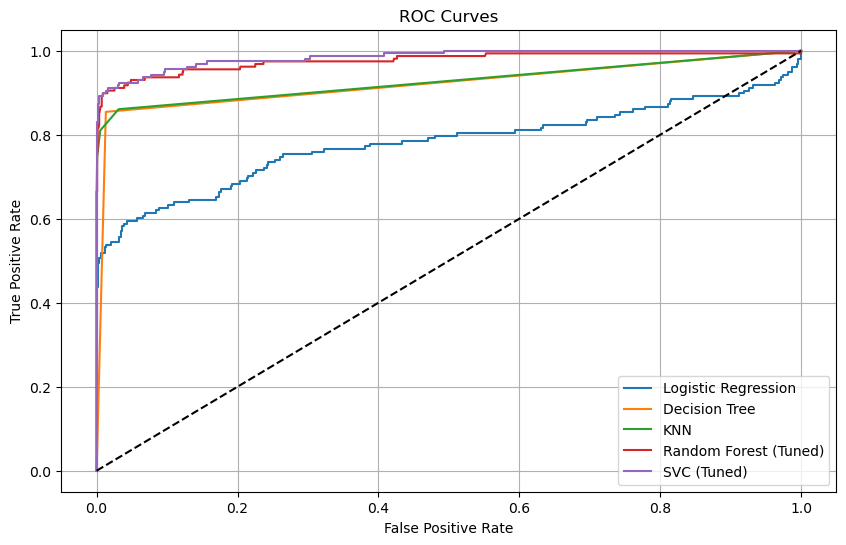

In [24]:
plt.figure(figsize=(10,6))
for name, y_prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

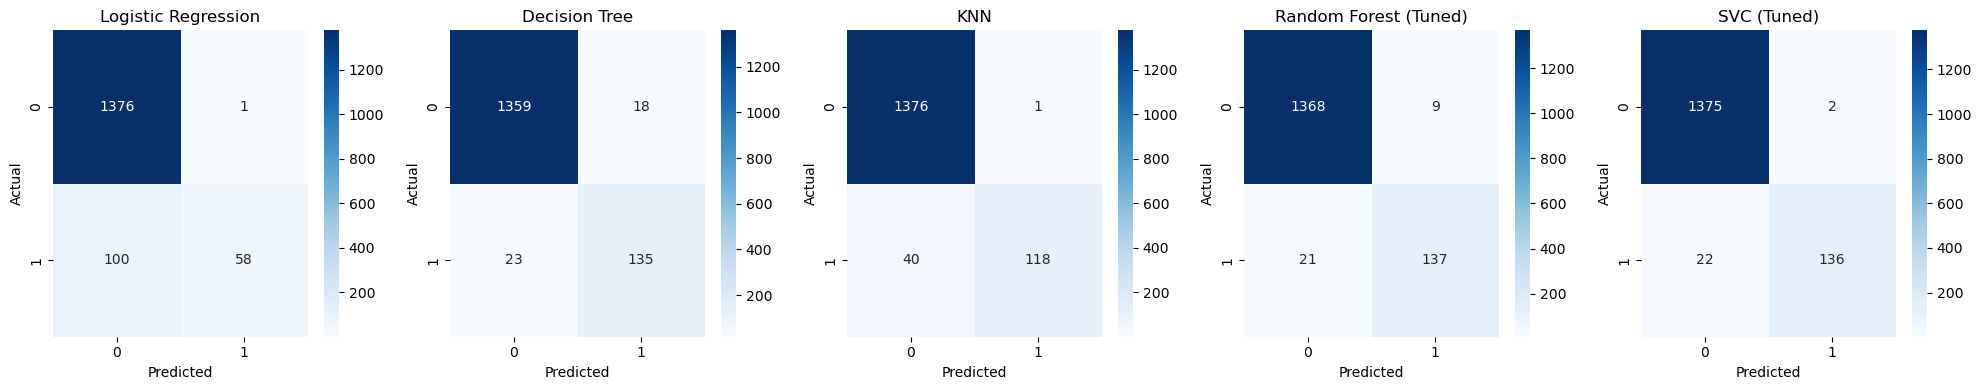

In [25]:
fig, axes = plt.subplots(1, 5, figsize=(20,4))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [26]:
# Format: [temperature, pressure, vibration, humidity, equipment, location]
new_data = np.array([[78, 35, 2.1, 60, 1, 2]])
scaled_input = scaler.transform(new_data)
prediction = best_rf.predict(scaled_input)
print("Prediction (1 = Faulty, 0 = Not Faulty):", int(prediction[0]))

Prediction (1 = Faulty, 0 = Not Faulty): 0


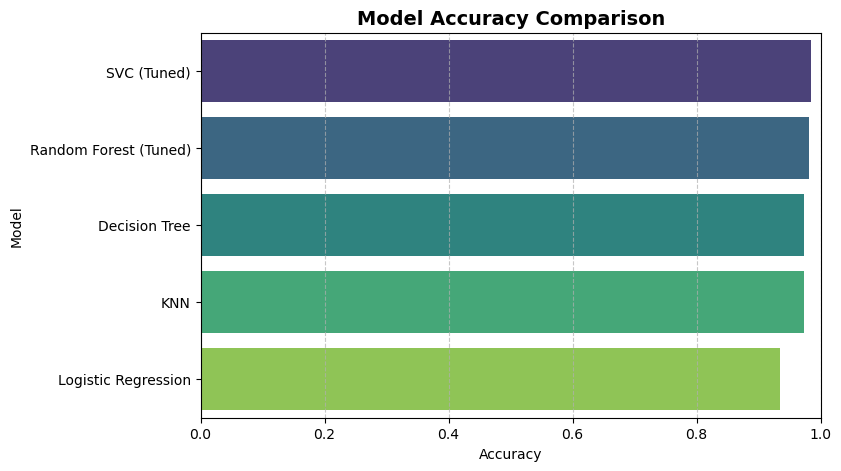

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Accuracy', 
    y='Model', 
    data=results_df.sort_values(by='Accuracy', ascending=False), 
    palette='viridis'
)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0, 1)  # Accuracy range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()